# Frequentist Inference Case Study - Part B

## Demonstrated Items

* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, I used only data from a known normal distribution.

## Hospital medical charges

This uses medical charges data obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
mean_charges = medical['charges'].mean()
medical['charges'].std()

12110.011236693994

Text(0.5, 0, 'Charges')

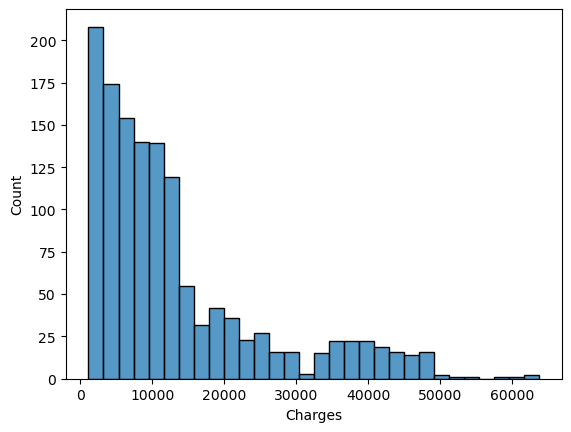

In [5]:
import seaborn as sns
sns.histplot(medical['charges'])
plt.xlabel("Charges")

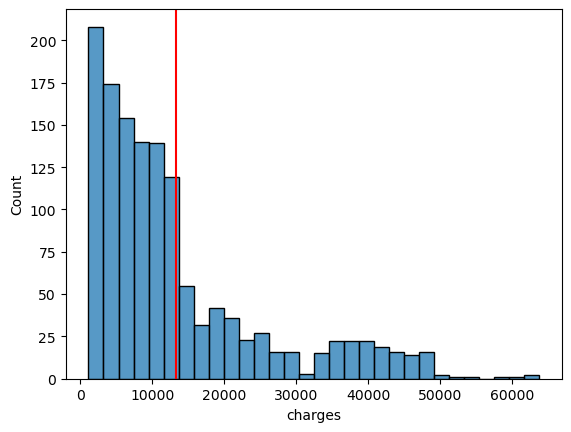

In [6]:
sns.histplot(medical['charges'])
plt.axvline(mean_charges, color='red', linestyle='-', label=f'Mean: {mean_charges:.2f}')
plt.show()

In [7]:
sample_mean = medical['charges'].mean()
sample_std = medical['charges'].std()
n = len(medical['charges'])


from scipy import stats

In [8]:
#Nully hypothesis is 'mean of 12000'
mu_0 = 12000

t_statistic = (sample_mean - mu_0) / (sample_std / (n ** 0.5))
df = n - 1   #degrees of freedom
    
p_value = stats.t.cdf(t_statistic, df)

In [9]:
print(f"P-value: {p_value}")

#The P value is greater than .05, so we fail to reject the null hypothesis, meaning the average charge is not significantly less than 12000

P-value: 0.9999349141739535


In [10]:
import numpy as np
import scipy.stats as stats

import numpy as np
import pandas as pd
from scipy.stats import t

insured = medical[medical['insuranceclaim'] == 1]['charges']
uninsured = medical[medical['insuranceclaim'] == 0]['charges']

n1 = len(insured)
n2 = len(uninsured)

mean1 = np.mean(insured)
mean2 = np.mean(uninsured)

var1 = np.var(insured, ddof=1)
var2 = np.var(uninsured, ddof=1)


sp = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))   #This is the pooled standard deviation

t_stat = (mean1 - mean2) / (sp * np.sqrt((1/n1) + (1/n2)))

df = n1 + n2 - 2

p_value = 2 * (1 - t.cdf(abs(t_stat), df))

print(f"Manual t-statistic: {t_stat}")
print(f"Manual p-value: {p_value}")

Manual t-statistic: 11.893299030876715
Manual p-value: 0.0


In [11]:
from scipy.stats import ttest_ind

t_stat_scipy, p_value_scipy = ttest_ind(insured, uninsured, equal_var=True)

print(f"Scipy t-statistic: {t_stat_scipy}")
print(f"Scipy p-value: {p_value_scipy}")

Scipy t-statistic: 11.893299030876712
Scipy p-value: 4.461230231620717e-31


Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test